In [28]:
!sudo apt-get install -y fonts-nanum
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (33.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
#pip install folium
final_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종데이터_final_ver1.csv", encoding='euc-kr')
#mclp_data=pd.read_csv("/content/drive/MyDrive/WCRC2023/센서위치선정_ver2.csv", encoding='euc-kr')
new_df =pd.read_csv("/content/drive/MyDrive/WCRC2023/모델링_결과_StandardScaler.csv", encoding='euc-kr')


In [19]:
# 'pick' 열 추가 및 값 할당
final_data['pick'] = final_data['cctvid'].isin(new_df['cctvid']).astype(int)

# 결과 DataFrame 저장
final_data_pick = final_data.copy()


# 결과 출력
print(final_data_pick)

       cctvid        관측소_거리  버스정류장_이용객수       지하철역_지표     학교_거리  처리시설_개수  \
0     27732.0    773.428059      1105.0   4734.835481  0.003987      1.0   
1     23150.0   2478.272099        10.0   1223.498595  0.004408      0.0   
2     23218.0    773.428059       555.0   1519.760748  0.001708      2.0   
3     13029.0   5440.834426      1078.0   2137.518541  0.002264      0.0   
4     28171.0   2944.528917       648.0  11564.442909  0.002774      0.0   
...       ...           ...         ...           ...       ...      ...   
9995   8426.0   1926.335513      2083.0  10071.799945  0.002284      1.2   
9996  21307.0  12530.164851        30.0   4557.375535  0.001101      0.0   
9997   6071.0   7183.591012      1398.0    616.003012  0.001732      0.0   
9998   2091.0   1765.773760      1877.0  11317.730672  0.004915      1.0   
9999  32129.0  12530.164851         0.0    337.964501  0.000534      0.0   

            CAI  pick  
0     56.081565     1  
1     61.861948     0  
2     61.861948

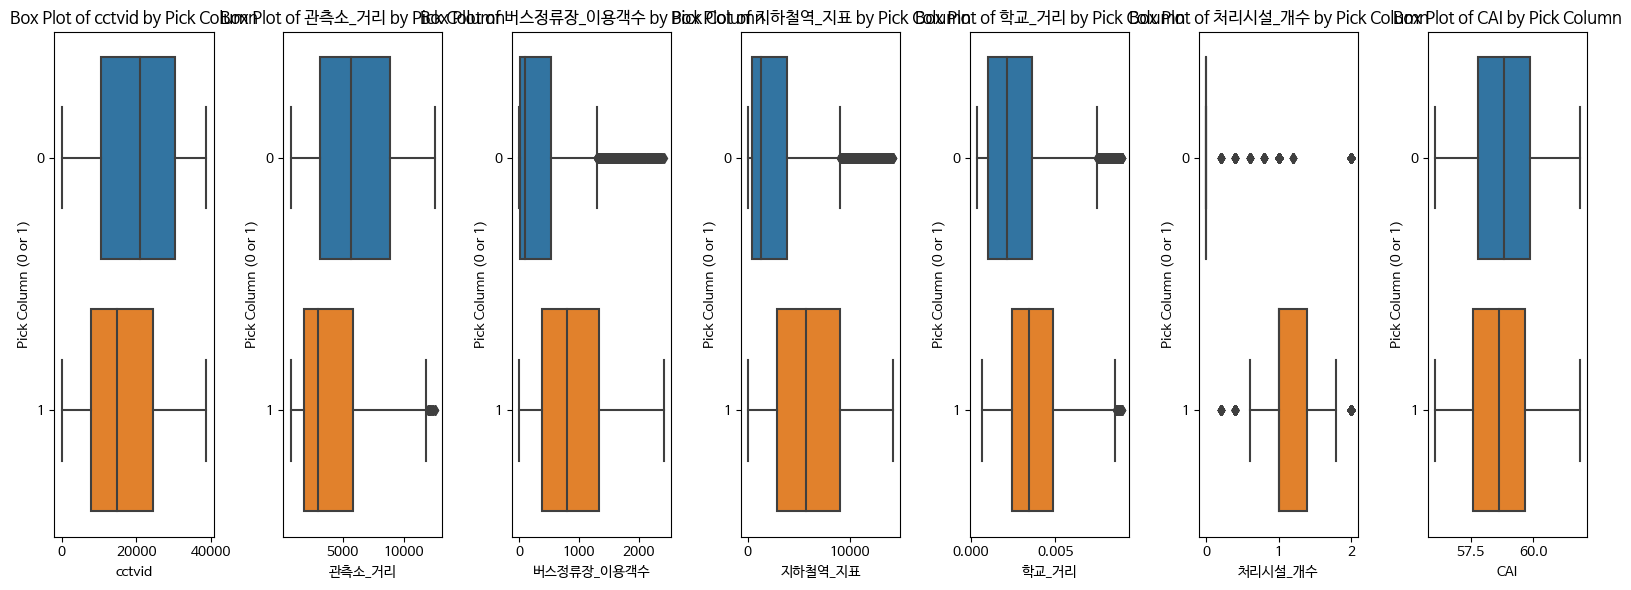

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 리스트 생성
variables_to_plot = ['cctvid', '관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']

# 서브 플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=len(variables_to_plot), figsize=(16, 6))
plt.rcParams["font.family"] = "NanumBarunGothic"
plt.rc('font', family='NanumBarunGothic')

# 각 변수에 대한 box plot 그리기 (가로로)
for i, variable in enumerate(variables_to_plot):
    sns.boxplot(x=variable, y='pick', data=final_data_pick, ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot of {variable} by Pick Column')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Pick Column (0 or 1)')

plt.tight_layout()
plt.show()


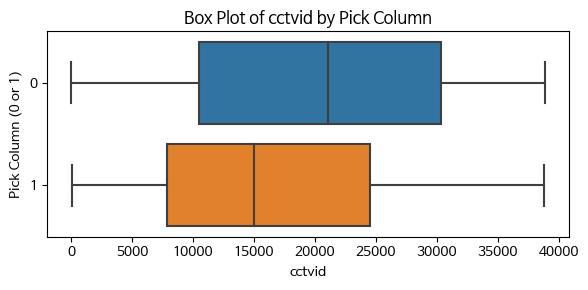

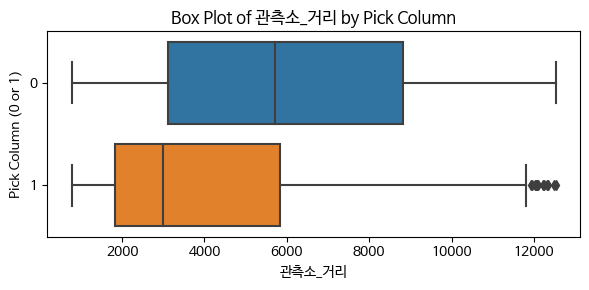

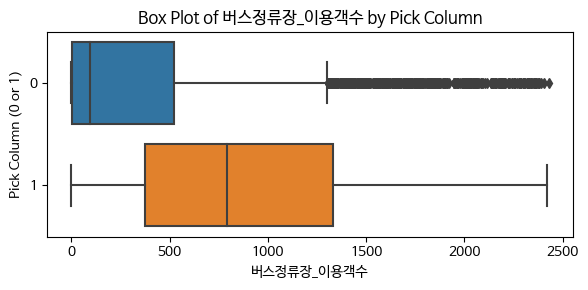

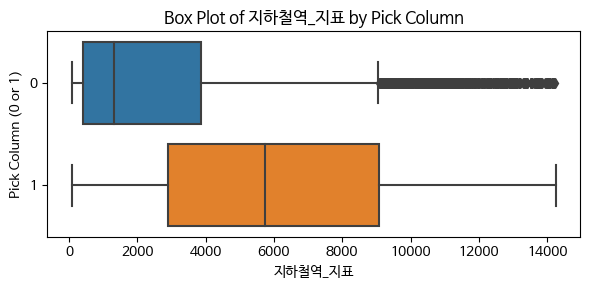

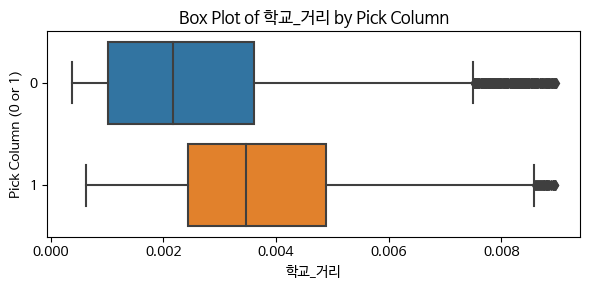

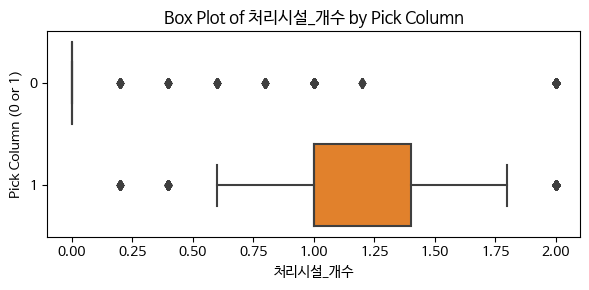

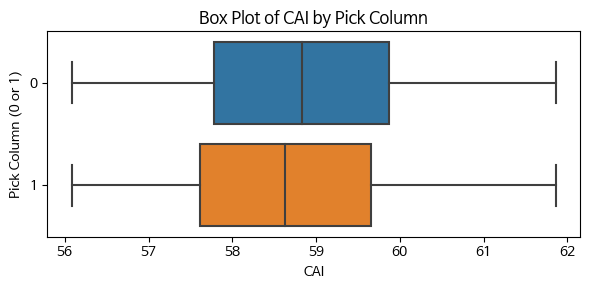

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 리스트 생성
variables_to_plot = ['cctvid', '관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']

# Set the font family for Korean text
plt.rcParams["font.family"] = "NanumBarunGothic"
plt.rc('font', family='NanumBarunGothic')

# Load your data into the final_data_pick variable (replace this with your actual data loading)

# Create separate box plots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=variable, y='pick', data=final_data_pick, orient='h')
    plt.title(f'Box Plot of {variable} by Pick Column')
    plt.xlabel(variable)
    plt.ylabel('Pick Column (0 or 1)')
    plt.tight_layout()
    plt.show()


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 변수 리스트 생성
variables_to_plot = ['cctvid', '관측소_거리', '버스정류장_이용객수', '지하철역_지표', '학교_거리', '처리시설_개수', 'CAI']

# Set the font family for Korean text
plt.rcParams["font.family"] = "NanumBarunGothic"
plt.rc('font', family='NanumBarunGothic')

# Load your data into the final_data_pick variable (replace this with your actual data loading)

# Calculate means for pick=0 and pick=1
means_by_pick = final_data_pick.groupby('pick')[variables_to_plot].mean()

# Display the means
print("Mean values for pick=0:")
print(means_by_pick.loc[0])
print("\nMean values for pick=1:")
print(means_by_pick.loc[1])


Mean values for pick=0:
cctvid        20242.047573
관측소_거리         6053.050183
버스정류장_이용객수      359.443376
지하철역_지표        2708.631119
학교_거리             0.002571
처리시설_개수           0.127275
CAI              58.866536
Name: 0, dtype: float64

Mean values for pick=1:
cctvid        15776.903441
관측소_거리         4027.481341
버스정류장_이용객수      893.152497
지하철역_지표        5998.416198
학교_거리             0.003836
처리시설_개수           1.175805
CAI              58.677792
Name: 1, dtype: float64


In [24]:
# Calculate row counts for pick=0 and pick=1
row_counts_by_pick = final_data_pick['pick'].value_counts()

# Display row counts
print("\nRow counts for pick=0:", row_counts_by_pick[0])
print("Row counts for pick=1:", row_counts_by_pick[1])



Row counts for pick=0: 8198
Row counts for pick=1: 1802


In [ ]:
#421개
Mean values for pick=0:
cctvid        19488.255401
관측소_거리         5671.816635
버스정류장_이용객수      466.366141
지하철역_지표        3366.338663x``
학교_거리             0.002844
처리시설_개수           0.321094
CAI              58.833894
Name: 0, dtype: float64

Mean values for pick=1:
cctvid        18275.205251
관측소_거리         6059.073035
버스정류장_이용객수      209.841527
지하철역_지표        1817.692525
학교_거리             0.001773
처리시설_개수           0.204773
CAI              58.801193
Name: 1, dtype: float64